<a href="https://colab.research.google.com/github/Tung1012/AI-HWs/blob/main/Ds%26Cs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ductung-19146300
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau


import random
import os

In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [ ]:
from mtcnn import MTCNN
import cv2
filename = '/content/avtt.jpg'
pixel = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixel)
for face in faces:
  print(face)

{'box': [131, 210, 574, 730], 'confidence': 0.9997929930686951, 'keypoints': {'left_eye': (368, 453), 'right_eye': (616, 489), 'nose': (513, 625), 'mouth_left': (347, 751), 'mouth_right': (559, 782)}}


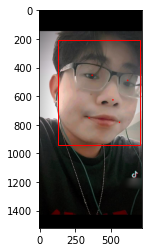

In [ ]:
filename = '/content/avtt.jpg'


data = plt.imread(filename)
plt.imshow(data)
ax=plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect = plt.Rectangle((x,y),width,height,fill=False,color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()

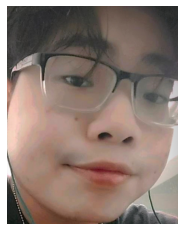

In [ ]:
filename = '/content/avtt.jpg' 


def draw_face(filename,result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1 , y1, width , height = result_list[i]['box']
    x2, y2 = x1 + width,y1+height
    plt.subplot(1,len(result_list) , i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2 , x1:x2])
  plt.show()


pixel = plt.imread(filename) 
detector = MTCNN()  
faces = detector.detect_faces(pixel) 
draw_face(filename,faces)

## START Ds&Cs

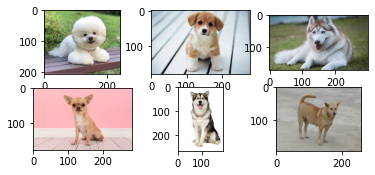

In [22]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/AI/train/dog/'
for i in range(6):
  plt.subplot(330+i+1)
  filename = folder + 'dog.' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [12]:
Image_Size = (128,128,3)


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau


import random
import os

In [17]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.1 MB/s 


In [23]:
filenames= os.listdir("/content/drive/MyDrive/AI/train")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [24]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 61, 61, 64)      

In [25]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [ ]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/AI/train/',
                                                 shuffle=True,
                                                 target_size=(128, 128), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/AI/validation/',
                                                 shuffle=True,
                                                 target_size=(128, 128), 
                                                 subset="validation",
                                                 class_mode='categorical')

In [ ]:
#plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
filename = '/content/dog_2.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (128,128))
img = img_to_array(img)
img =  img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis= -1)